<a href="https://colab.research.google.com/github/Falhebshi/Data-Mining/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Phase#2: Data Summarization and Preprocessing**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


df = pd.read_csv('/garments_worker_productivity.csv')
#df = pd.read_csv('Raw_data.csv')
df = pd.DataFrame(df)

# --- Make a copy of the raw dataset to keep it unedited ---
Preprocessed_dataset = df.copy()

##**Part 1: Data Summarization**
In this part, we apply various summarization and visualization techniques to gain a clear understanding of the dataset and its structure. For numerical attributes, we calculate the five-number summary, which includes the minimum, first quartile, median, third quartile, and maximum values. This helps in identifying the data range, detecting skewness, and spotting potential outliers that may require further preprocessing. Boxplots are also used to visually confirm the presence of outliers and to observe the spread of data across different features.

In addition, we use several plotting methods to explore both numerical and categorical attributes. Scatter plots are utilized to examine relationships between variables, histograms to visualize the distribution and frequency of numeric data, and bar plots to display counts and proportions of categorical features. Each visualization is carefully interpreted to determine what it reveals about the dataset and how it supports decisions for preprocessing. Through these techniques, we identify irregularities such as missing values, inconsistent scales, or extreme values, providing a solid foundation for the data cleaning and transformation steps that follow.

###**Pre-EDA Data Consistency and Cleaning**
Before starting the Exploratory Data Analysis (EDA), it is essential to ensure that all categorical data fields are consistent and free from input errors that could disrupt or mislead the analysis. Maintaining data uniformity at this stage helps guarantee that any insights drawn later are accurate and reliable.

During inspection, the department column was found to contain two issues: a duplicate category for 'finishing' caused by an extra space ('finishing '), and a misspelling of 'sewing' recorded as 'sweing'. These inconsistencies likely resulted from human input errors. To maintain data clarity and ensure transparent analysis, these categorical values were corrected and standardized before proceeding with EDA.

After making these corrections, the cleaned values were verified and saved to the preprocessed dataset, ensuring that all categorical attributes are now accurate, uniform, and ready for exploration in the next stage.




In [ ]:
# --- Have a look at the domains for our categorical columns ---
for col in ['department', 'day', 'quarter']:
    print(f"\nOriginal values in {col}:")
    print(df[col].unique())


Original values in department:
['sweing' 'finishing ' 'finishing']

Original values in day:
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

Original values in quarter:
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


In [ ]:
# --- Correct department name typos ---
Preprocessed_dataset['department'] = Preprocessed_dataset['department'].replace({
    'sweing': 'sewing',
    'finishing ': 'finishing'
})


In [ ]:
# --- Display unique cleaned values for our categorical columns ---
for col in ['department', 'day', 'quarter']:
    print(f"\nCleaned values in {col}:")
    print(Preprocessed_dataset[col].unique())




Cleaned values in department:
['sewing' 'finishing']

Cleaned values in day:
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

Cleaned values in quarter:
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


###**Statistical Summaries**
We will display the 5 number summary in addition to the mean, standard deviation and count for each *numeric* column.

In [ ]:
Preprocessed_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


### **Outlier Analysis**
We will show the amount of outliers for each *numeric* column then follow-up with a boxplot that depicts it visually




In [ ]:
outlier_summary = {}
#Selecting only numerical columns
numeric_cols = [
    'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
    'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']

for col in numeric_cols:
    Q1 = Preprocessed_dataset[col].quantile(0.25)
    Q3 = Preprocessed_dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (Preprocessed_dataset[col] < lower) | (Preprocessed_dataset[col] > upper)
    outlier_count = mask.sum()
    outlier_summary[col] = {'Q1':Q1, 'Q3':Q3, 'IQR':IQR, 'lower':lower, 'upper':upper, 'count':int(outlier_count)}
    print(f"\n{col}: {outlier_count} outliers")





targeted_productivity: 79 outliers

smv: 0 outliers

wip: 22 outliers

over_time: 1 outliers

incentive: 11 outliers

idle_time: 18 outliers

idle_men: 18 outliers

no_of_style_change: 147 outliers

no_of_workers: 0 outliers

actual_productivity: 54 outliers



###**Boxplots**
Boxplots for all of our *numeric* columns


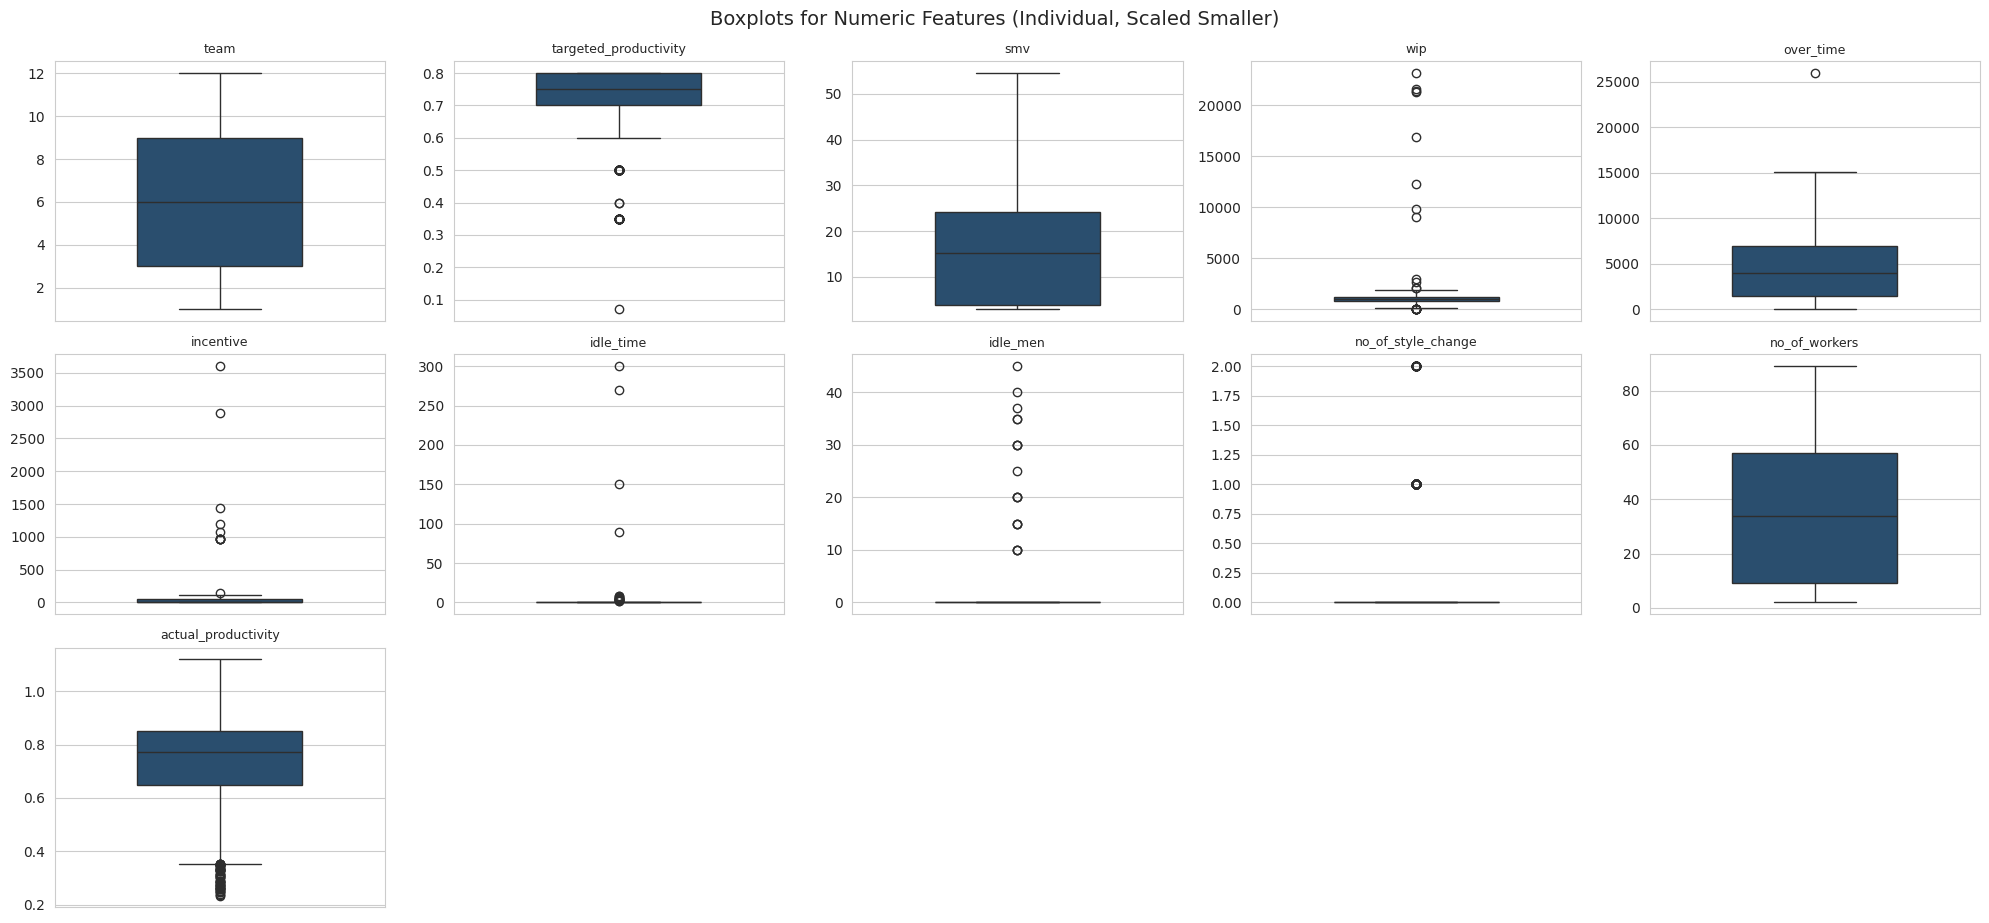

In [ ]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Layout settings
cols_per_row = 5  # number of boxplots per row
rows = math.ceil(len(numeric_cols) / cols_per_row)

# Set up figure
plt.figure(figsize=(4 * cols_per_row, 3 * rows))
sns.set_style('whitegrid')

# Loop through each numeric feature
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(y=df[col], color='#1f4e79', width=0.5)  # darker blue
    plt.title(col, fontsize=9)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle('Boxplots for Numeric Features (Individual, Scaled Smaller)', fontsize=14, y=1.02)
plt.show()

### 1. Targeted Productivity

Description of the plot:
The boxplot shows how the targeted productivity values are distributed for all teams, with most points concentrated around 0.75–0.8.

Information provided:
This reveals that nearly all teams are assigned similar productivity targets, suggesting consistency across departments.

Preprocessing implication:
Because the distribution is narrow and uniform, this feature does not require scaling or normalization but can be checked for missing or constant values.

### 2. SMV (Standard Minute Value)

Description of the plot:
The boxplot displays SMV values ranging from approximately 2.9 to 54.6, with a wide interquartile range and several high outliers.

Information provided:
This indicates that production tasks vary greatly in complexity and time requirements, as some jobs take significantly longer to complete.

Preprocessing implication:
The large spread and right-skewed distribution suggest the need for normalization or scaling to reduce skewness and prevent large SMV values from dominating the analysis.

###3. WIP (Work in Progress)

Description of the plot:
The boxplot reveals a wide range of WIP values, with a strong right skew and several large outliers.

Information provided:
Most teams maintain moderate WIP levels, but a few have abnormally high amounts of unfinished work, which could indicate process bottlenecks or inconsistent production flow.

Preprocessing implication:
Because of the high variability and extreme outliers, this column requires normalization and outlier treatment to prevent it from distorting model performance.

###4. Overtime

Description of the plot:
The boxplot shows a right-skewed distribution, where most teams record relatively low overtime, while several exhibit very high values above 7,000 minutes, including an extreme spike near 25,000 minutes.

Information provided:
This demonstrates that overtime levels vary widely between teams — while most work within normal limits, some accumulate substantially longer total hours.

Preprocessing implication:
The extreme upper values act as high-end outliers and should be handled with scaling or capping to prevent them from disproportionately affecting statistical and predictive models.

###5. Incentive

Description of the plot:
The boxplot shows that most incentive values are clustered around zero, with a few significantly higher outliers.

Information provided:
This means that most employees or teams receive little to no incentives, while a few receive very large bonuses, creating a heavily right-skewed distribution.

Preprocessing implication:
To prevent large incentive values from dominating, this feature requires outlier handling and possibly normalization to balance the scale.

###6. Idle Time

Description of the plot:
The boxplot indicates that most values are close to zero, but a few observations show noticeably higher idle times.

Information provided:
This suggests that while most teams operate efficiently with minimal downtime, certain instances reflect significant idle periods that deviate from the norm.

Preprocessing implication:
Due to the skewed distribution and outliers, this column should undergo outlier treatment and possibly log transformation to stabilize variance.

###7. Idle Men

Description of the plot:
The boxplot shows that most teams have zero or very few idle workers, while a small number of cases show a large idle workforce.

Information provided:
This highlights a similar trend to idle time — most production lines are fully utilized, but some experience exceptional inactivity.

Preprocessing implication:
Because of the sparse distribution and outliers, outlier removal or scaling is recommended to limit the influence of extreme idle counts.

###8. Number of Style Changes

Description of the plot:
The boxplot displays mostly low values (0–1) for the number of style changes, with a few much higher outliers.

Information provided:
This shows that most teams maintain stable production styles, while a few experience frequent changeovers that could affect consistency.

Preprocessing implication:
The right-skewed distribution suggests the need for outlier handling and normalization to standardize this feature before modeling.

###9. Number of Workers

Description of the plot:
The boxplot shows a wide range in the number of workers per team, with several points lying above the upper whisker as outliers.

Information provided:
This indicates variation in team sizes, with some production lines significantly larger than others.

Preprocessing implication:
To maintain balanced scaling across features, this variable should be scaled, and large outliers should be inspected or capped to ensure they don’t dominate the model.

###10. Actual Productivity

Description of the plot:
The boxplot shows that average productivity lies around 0.77, with a narrow interquartile range and some low outliers. The histogram reveals most values between 0.6 and 1.0, with fewer below 0.5.

Information provided:
This suggests that most teams achieve average or above-average productivity, but some underperform relative to the majority.

Preprocessing implication:
Because the data is slightly right-skewed with a few low extremes, this feature can benefit from discretization (e.g., grouping into low, medium, and high productivity categories) to support classification or performance analysis.

This concludes that only the 'WIP' column has missing values that need to be handled.

###**Distribution of Numeric Features**
We will show this using histograms combined with KDE






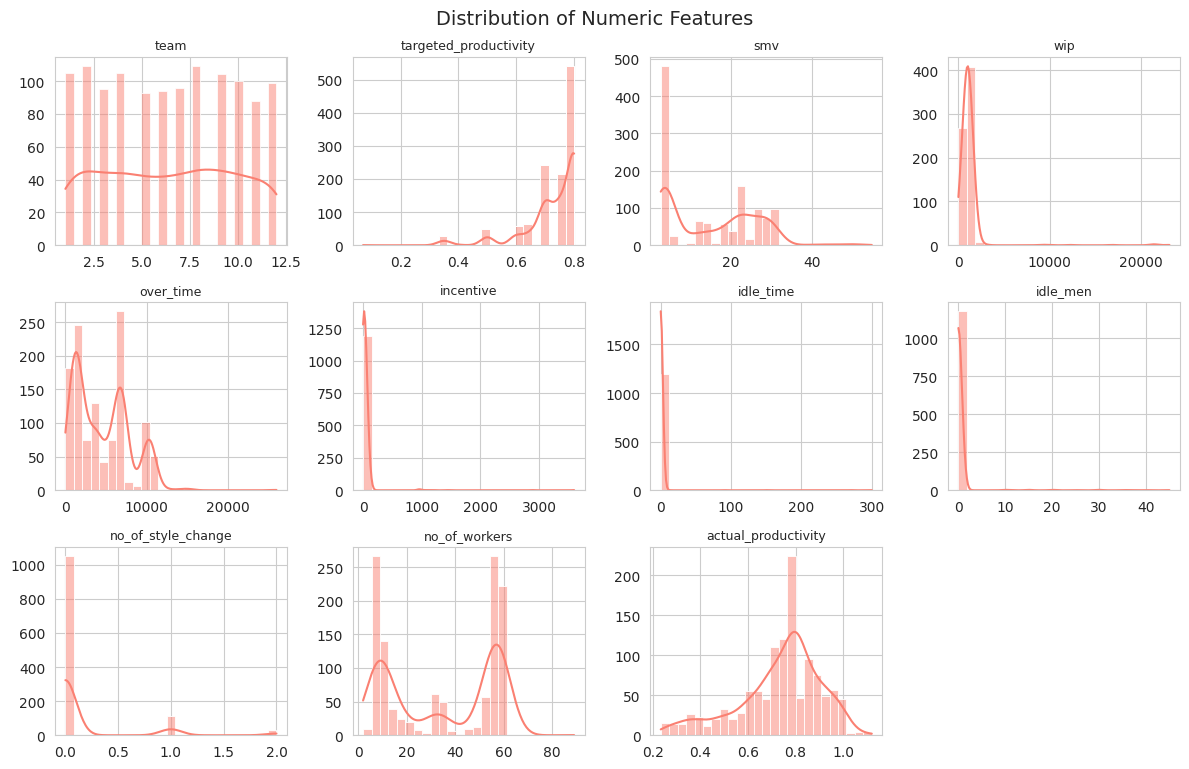

In [ ]:
plots_per_row = 4        # how many histograms per row
rows = 3                 # total number of rows
total_plots = len(numeric_cols)
sns.set_style('whitegrid')

plt.figure(figsize=(plots_per_row * 3, rows * 2.5))  # to make them compact and horizontal

for i, col in enumerate(numeric_cols[:plots_per_row * rows], 1):
    plt.subplot(rows, plots_per_row, i)
    sns.histplot(Preprocessed_dataset[col], kde=True, color='salmon', bins=25)
    plt.title(f'{col}', fontsize=9)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle('Distribution of Numeric Features', fontsize=14, y=1.02)
plt.show()


**Description of the plots**:

The plots display the distribution of all numeric features in the dataset, each showing how values are spread across their respective ranges before any preprocessing. The KDE lines highlight the overall shape of each distribution.

**What insights it provides**:

Several features, such as wip, over_time, and incentive, exhibit strong right-skewness with extreme values on the higher end, while others like targeted_productivity and actual_productivity appear more concentrated around specific values. This shows variability in feature scales and unequal data spread across attributes.

**What preprocessing task it suggests**:

The differences in scale and skewness suggest the need for normalization or standardization to align feature ranges, as well as outlier treatment to handle the heavily skewed variables before model training.

### **Missing Value Analysis**
we will inspect if we have any and analyze and insights we can extract from our findings.

In [ ]:
missing_counts = Preprocessed_dataset.isnull().sum()
print("Missing values in each column:")
print(missing_counts)
print()


Missing values in each column:
date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64



wip    506
dtype: int64


/tmp/ipython-input-3104197456.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette='viridis')


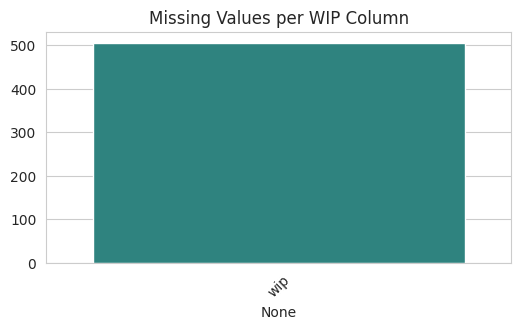

In [ ]:
#Visualizing this with a bar chart
missing = Preprocessed_dataset.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

plt.figure(figsize=(6,3))
sns.barplot(x=missing.index, y=missing.values, palette='viridis')
plt.title('Missing Values per WIP Column')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-3599435109.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Missing Count', data=missing_by_dept, palette='Blues_r')


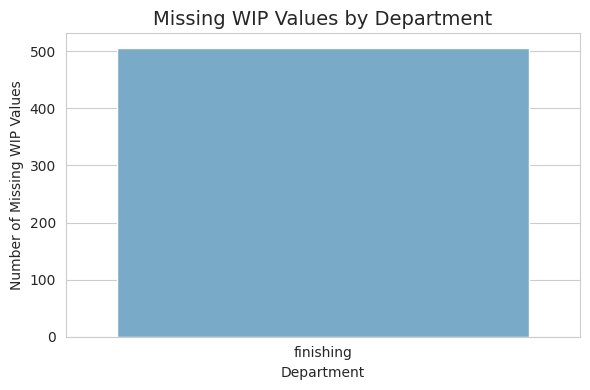

In [ ]:
# Filter rows where WIP is missing
missing_wip = Preprocessed_dataset[Preprocessed_dataset['wip'].isnull()]

# Count missing WIP by department
missing_by_dept = missing_wip['department'].value_counts().reset_index()
missing_by_dept.columns = ['Department', 'Missing Count']

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x='Department', y='Missing Count', data=missing_by_dept, palette='Blues_r')
plt.title('Missing WIP Values by Department', fontsize=14)
plt.xlabel('Department')
plt.ylabel('Number of Missing WIP Values')
plt.tight_layout()
plt.show()


**What the plots show**:
The first bar plot displays the number of missing values for each column, revealing that only the WIP column contains missing data. The second plot breaks this down by department, showing that all missing WIP values occur in the Finishing department.

**What insights it provides**:
This indicates that missing WIP data is not random, but isolated to a specific department. This suggests a systematic issue in how WIP was recorded or measured for the Finishing department.

**What preprocessing step it suggests**:
Since the missing data is department specific, it should be handled carefully either by imputing values based on similar Finishing department records or by excluding those rows if imputation isn’t reliable. Further, another option could be looking at it in a logical sense and filling in missing values with zeros since the department's name kind of alludes to its task of finishing these pieces thus not having any wip left.




--------------------------------




###**Noise Inspection**
Performed on selected columns based on observations obtained from histograms


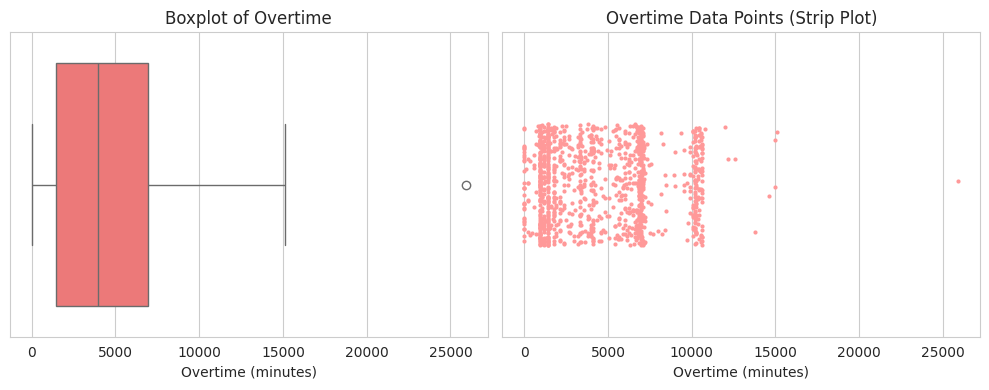

In [ ]:
plt.figure(figsize=(10,4))

# Boxplot
plt.subplot(1,2,1)
sns.boxplot(x=Preprocessed_dataset['over_time'], color='#ff6666')
plt.title('Boxplot of Overtime')
plt.xlabel('Overtime (minutes)')

# Strip Plot
plt.subplot(1,2,2)
sns.stripplot(x=Preprocessed_dataset['over_time'], color='#ff9999', jitter=0.2, size=3)
plt.title('Overtime Data Points (Strip Plot)')
plt.xlabel('Overtime (minutes)')

plt.tight_layout()
plt.show()




**Description of the plot**:

The boxplot and strip plot visualize the spread of team overtime values (in minutes), showing both the common range and the presence of an extreme outlier.

**What insights it provides**:

Most teams record overtime between 1,000 and 10,000 minutes, which equals roughly 17 to 167 hours of extra work per month, a realistic range for factory teams.
However, one record shows overtime of around 25,000 minutes (about 416 hours), which is unrealistic even if shared among 54 workers, which was the amount of team members. This anomaly strongly suggests a transmission or entry error rather than actual overtime.

**What preprocessing task it suggests**:

This record should be flagged and removed during noise smoothing, ensuring that the dataset reflects realistic overtime patterns and that such extreme unrealistic outliers don’t skew statistical analysis or model behavior.

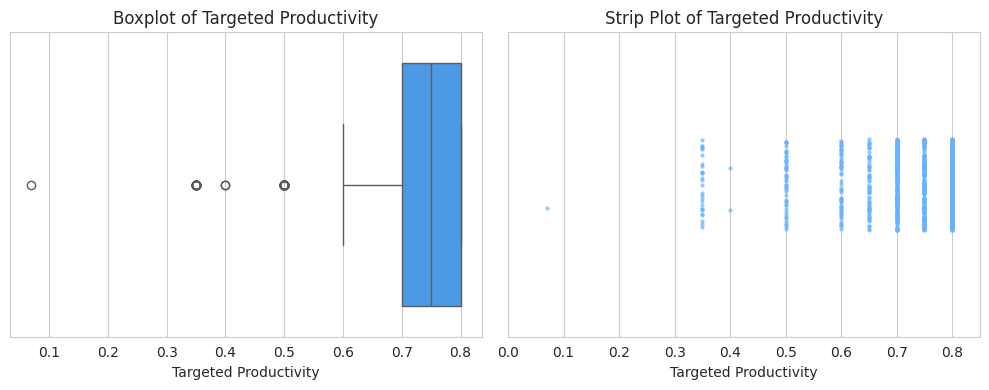

In [ ]:

plt.figure(figsize=(10,4))

# Boxplot (left)
plt.subplot(1,2,1)
sns.boxplot(x=Preprocessed_dataset['targeted_productivity'], color='#3399ff')
plt.title('Boxplot of Targeted Productivity')
plt.xlabel('Targeted Productivity')

# Strip Plot (right)
plt.subplot(1,2,2)
sns.stripplot(x=Preprocessed_dataset['targeted_productivity'], color='#66b3ff', size=3, jitter=0.15, alpha=0.7)
plt.title('Strip Plot of Targeted Productivity')
plt.xlabel('Targeted Productivity')
plt.xlim(0, 0.85)  # keeps focus on full range without squeezing



plt.tight_layout()
plt.show()


**Description of the plot**:

The boxplot and strip plot show the distribution of targeted productivity values across all teams. Most data points are grouped between 0.7 and 0.8, with a few noticeably lower values and one extreme point around 0.07.

**What insights it provides**:

The majority of teams have realistic and consistent productivity targets near 70–80%, but the single record at 0.07 (7%) is implausibly low and likely the result of a human or entry error (perhaps meant to be 0.7 instead). This makes it a clear candidate for noise removal.

**What preprocessing task it suggests**:

Inspect and eliminate the unrealistic 0.07 value as part of the noise removal step, ensuring that all productivity targets remain within a reasonable operational range.

----------------

### **Distribution of Actual Productivity**
Indicates the need for descretization for classification model

/tmp/ipython-input-125054254.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


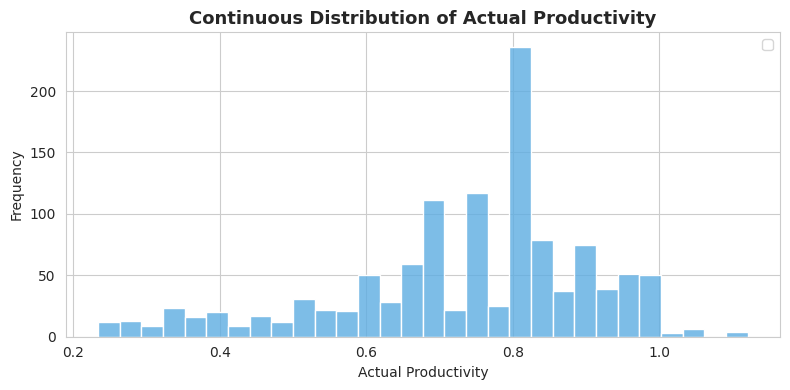

In [ ]:
plt.figure(figsize=(8,4))

# Histogram plot
sns.histplot(Preprocessed_dataset['actual_productivity'], bins=30, color='#5dade2', alpha=0.8)

# Titles and labels
plt.title('Continuous Distribution of Actual Productivity', fontsize=13, fontweight='bold')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()



**Description of the plot**:

The histogram displays the continuous distribution of actual productivity values for all records. Most observations fall between 0.7 and 0.9, showing that the majority of workers perform close to the expected target productivity, while fewer cases appear at the lower end.

**What insights it provides**:

The plot highlights that productivity values are spread continuously rather than grouped, and the range is not perfectly uniform and some records reflect notably lower or higher performance levels. This continuous spread makes it challenging to interpret productivity patterns or compare performance categories directly.

**What preprocessing task it suggests**:

From this, we can see that a discretization (binning) step is needed. We will convert the continuous actual_productivity values into defined ranges or categories such as Low (0.0–0.5), Medium (0.5–0.75), and High (0.75–1.0 so that productivity levels can be analyzed more clearly and used effectively in classification-based modeling later.



---



###**Value Range Analysis**
Indicates the need for normalization of certain numeric columns for clustering


/tmp/ipython-input-2904160.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranges.index, y=ranges.values, palette='Blues_r')


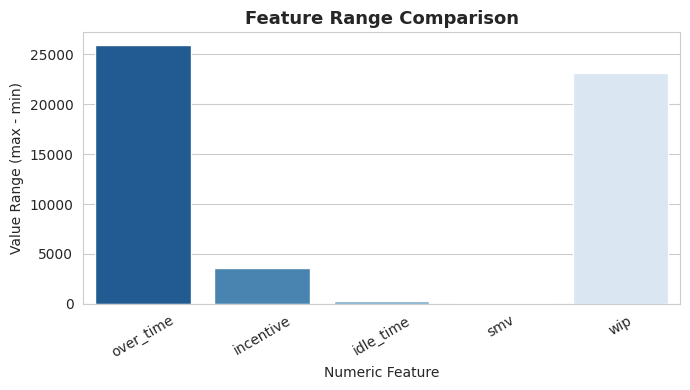

In [ ]:

# Select numeric columns relevant for K-Means
numeric_cols = ['over_time', 'incentive', 'idle_time', 'smv', 'wip']

# Compute ranges (max - min)
ranges = Preprocessed_dataset[numeric_cols].max() - Preprocessed_dataset[numeric_cols].min()

# Plot
plt.figure(figsize=(7,4))
sns.barplot(x=ranges.index, y=ranges.values, palette='Blues_r')
plt.title('Feature Range Comparison', fontsize=13, fontweight='bold')
plt.xlabel('Numeric Feature')
plt.ylabel('Value Range (max - min)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



**Description of the plot**:

The bar plot compares the value ranges (max–min) of numeric features such as over_time, incentive, idle_time, smv, and wip. It highlights how much each feature varies in magnitude and whether they exist on similar scales.

**What insights it provides**:

The plot reveals large discrepancies between feature ranges. For instance, over_time and wip exceed 20,000, while incentive and idle_time stay under 5,000. This shows that some features vary far more widely than others meaning they’re not on the same numeric scale. If used as is, larger-range attributes would dominate distance-based algorithms like K-Means, skewing clustering results.

**What preprocessing task it suggests**:

From this, we can see that a preprocessing task is needed specifically, normalization. Normalization will rescale all numeric features to a common range, ensuring equal influence during clustering and preventing large-value attributes (like over_time) from overpowering smaller ones (like incentive)



---



###**Variable Distributions with Respect to Class Label**




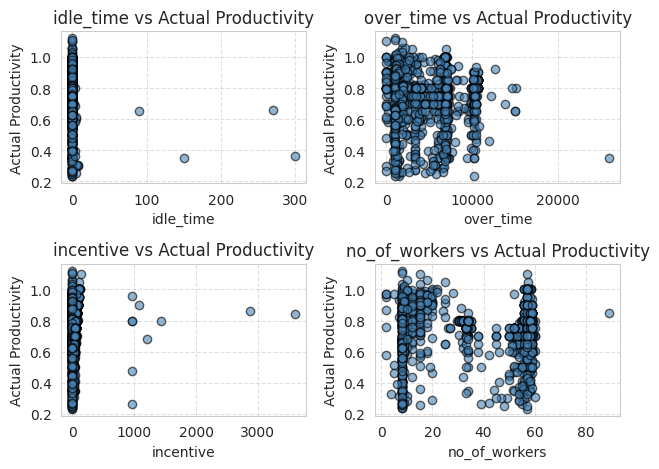

In [ ]:
factors = ['idle_time', 'over_time', 'incentive', 'no_of_workers']

for i, factor in enumerate(factors, 1):
    plt.subplot(2,2,i)
    plt.scatter(Preprocessed_dataset[factor], Preprocessed_dataset['actual_productivity'], alpha=0.6, color='steelblue', edgecolor='k')
    plt.title(f"{factor} vs Actual Productivity")
    plt.xlabel(factor)
    plt.ylabel("Actual Productivity")
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

1. idle_time vs Actual Productivity
The plot shows the relationship between idle_time and actual_productivity.
It contains points that represent each team’s idle time and their productivity level.
From the plot, we can see that as idle time increases, productivity decreases — most productive teams have very low idle time.
This insight shows that the data may contain large value differences, so normalization is needed before modeling to keep all features on a similar scale.

⸻

2. over_time vs Actual Productivity
The plot shows how over_time affects actual_productivity.
The points are spread unevenly, and there is no clear linear relationship between overtime and productivity.
Some teams work long overtime hours without a big productivity increase.
This suggests the data has wide ranges and different scales, so normalization is required to avoid bias when using clustering or regression models.

⸻

3. incentive vs Actual Productivity
The plot shows the link between incentive and actual_productivity.
It contains points mostly at low incentive values with varying productivity levels.
The lack of a strong pattern indicates that incentive data may have uneven value ranges and needs to be scaled (normalized) to ensure fair feature comparison during modeling.

⸻

4. no_of_workers vs Actual Productivity
This plot shows the relationship between no_of_workers and actual_productivity.
It shows that teams with a moderate number of workers tend to have higher productivity, while very small or large teams show lower productivity.
The variation in worker counts compared to productivity indicates the need for normalization, so that this feature does not dominate others with smaller numeric ranges.



---



##**Part 2: Data Preprocessing**
In this part, we apply a series of data preprocessing techniques to prepare the dataset for accurate and reliable analysis. The techniques used include Discretization, Noise Removal, Handling Missing Values, and Normalization. and each were selected based on the dataset’s structure and analytical needs.

For every technique, we provide a clear justification explaining why it was necessary, how it was implemented, and which attributes it was applied to. Each step also includes a concise description of the results, outlining how the dataset improved as a result of the transformation. These preprocessing actions help remove inconsistencies, reduce the impact of noise, balance feature scales, and enhance interpretability for downstream tasks such as K-Means clustering and Decision Tree classification.

At the end, snapshots of both the raw dataset and the preprocessed dataset are provided to clearly illustrate the changes made to clearly illustrate the changes.

###**Noise Removal**



In [ ]:


# --- 1. Check minimum value before cleaning ---
min_before = Preprocessed_dataset['targeted_productivity'].min()
print(f"Lowest targeted_productivity before cleaning: {min_before}")

# --- 2. Remove unrealistic or noisy values (below 0.1) ---
Preprocessed_dataset = Preprocessed_dataset[Preprocessed_dataset['targeted_productivity'] >= 0.1].reset_index(drop=True)

# --- 3. Check minimum value after cleaning ---
min_after = Preprocessed_dataset['targeted_productivity'].min()
print(f"Lowest targeted_productivity after cleaning: {min_after}")

# --- 4. Summary ---
removed_count = len(df) - len(Preprocessed_dataset)
print(f"\nNoise removal complete. {removed_count} data point removed.")


Lowest targeted_productivity before cleaning: 0.07
Lowest targeted_productivity after cleaning: 0.35

Noise removal complete. 1 data point removed.


In [ ]:
# --- 1. Check maximum value before cleaning ---
max_before = Preprocessed_dataset['over_time'].max()
print(f"Highest over_time before cleaning: {max_before}")

# --- 2. Remove values greater than 25,000 (noise) ---
Preprocessed_dataset = Preprocessed_dataset[Preprocessed_dataset['over_time'] <= 25000].reset_index(drop=True)

# --- 3. Check maximum value after cleaning ---
max_after = Preprocessed_dataset['over_time'].max()
print(f"Highest over_time after cleaning: {max_after}")

# --- 4. Summary ---
removed_count = len(df) - len(Preprocessed_dataset)
print(f"\nNoise removal complete. {removed_count} data points removed.")


Highest over_time before cleaning: 25920
Highest over_time after cleaning: 15120

Noise removal complete. 2 data points removed.




**Justification for the Technique (why and how it was applied and which attributes were selected for it)**:

Noise removal was done to eliminate unrealistic values that could distort the analysis and lead to inaccurate conclusions. This technique was chosen after EDA plots revealed anomalies in two attributes: over_time and targeted_productivity. One record showed an overtime value of around 25,000 minutes, which is unrealistic even when distributed across all 54 team members, and certain entries in targeted_productivity were below 0.1, which is implausibly low and likely due to a data entry error. To maintain accuracy, these records were filtered out by keeping only entries with over_time ≤ 25000 and targeted_productivity ≥ 0.1.

**Description of Preprocessing Results (and how this technique improved the dataset)**:

After removing the unrealistic records, both attributes reflected feasible and consistent ranges. The lowest targeted productivity value became 0.35, which is a realistic and attainable productivity level within factory conditions. Similarly, the lowest overtime value now stands at about 15,000 minutes, equivalent to approximately 250 hours, which represents a plausible cumulative overtime duration for a full team of 30. This process reduced data distortion, improved reliability, and ensured that the dataset now represents genuine target production behavior allowing for more accurate insights and dependable modeling outcomes.

###**Normalization**

In [ ]:
# --- step 1) Select columns to normalize ---
columns_to_normalize = ['smv', 'over_time', 'wip' , 'incentive' , 'idle_time']

# --- step 2) Extract those columns ---
data_to_normalize = Preprocessed_dataset[columns_to_normalize]

# --- step 3) Apply Min–Max scaling to bring values between 0 and 1 ---
minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)

# --- step 4) Replace the original columns with normalized values ---
Preprocessed_dataset[columns_to_normalize] = normalized_data_minmax

# --- step 5) Print sample output to confirm operation success ---
print("----- Min–Max normalized data for selected columns only ------")
print("")
print(Preprocessed_dataset.head())


----- Min–Max normalized data for selected columns only ------

       date   quarter department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1     sewing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing  Thursday     1                   0.75   
2  1/1/2015  Quarter1     sewing  Thursday    11                   0.80   
3  1/1/2015  Quarter1     sewing  Thursday    12                   0.80   
4  1/1/2015  Quarter1     sewing  Thursday     6                   0.80   

        smv       wip  over_time  incentive  idle_time  idle_men  \
0  0.450252  0.047631   0.468254   0.027222        0.0         0   
1  0.020132       NaN   0.063492   0.000000        0.0         0   
2  0.164731  0.041575   0.242063   0.013889        0.0         0   
3  0.164731  0.041575   0.242063   0.013889        0.0         0   
4  0.445219  0.050314   0.126984   0.013889        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0               

**Justification for the Technique (why and how it was applied and which attributes were selected)**:

Normalization was applied to ensure that all numerical features contribute equally during model training and clustering. This step was essential because K-Means clustering relies on distance calculations, and without normalization, features with larger numeric ranges can dominate smaller ones, skewing the results. To standardize scales and maintain proportional relationships between data points, the Min–Max Scaling technique was used. It transforms all feature values into a range between 0 and 1, ensuring uniform influence across variables. Normalization was applied to the following numeric attributes: smv, over_time, wip, incentive, and idle_time.

**Description of Preprocessing Results (and how this technique improved the dataset)**:

After normalization, all selected features were successfully scaled to a 0–1 range, making their values consistent and comparable. This adjustment ensures that each feature contributes equally to the clustering process, preventing large-valued attributes like over_time or wip from overpowering smaller ones such as incentive or idle_time. As a result, the dataset became more balanced and suitable for K-Means clustering, hopefully improving the accuracy and interpretability of our future clustering outcomes.

##**Descretization**

In [ ]:
# Define number of bins and labels
num_bins = 3
bin_labels = ['Low', 'Medium', 'High']

# Apply discretization
Preprocessed_dataset['discretized_actual_productivity'] = pd.cut(
    Preprocessed_dataset['actual_productivity'],
    bins=num_bins,
    labels=bin_labels,
    include_lowest=True
)

# Print summary
print('-------------------------------------------------------')
print('Discretization complete: actual_productivity → discretized_actual_productivity')
print('-------------------------------------------------------')
print('First few values:')
print(Preprocessed_dataset[['actual_productivity', 'discretized_actual_productivity']].head())
print('-------------------------------------------------------')
print('Number of instances for each label:')
print('-------------------------------------------------------')
print('Class  -- Count ---------------------------------------')
print(Preprocessed_dataset['discretized_actual_productivity'].value_counts())
print('-------------------------------------------------------')

-------------------------------------------------------
Discretization complete: actual_productivity → discretized_actual_productivity
-------------------------------------------------------
First few values:
   actual_productivity discretized_actual_productivity
0             0.940725                            High
1             0.886500                            High
2             0.800570                          Medium
3             0.800570                          Medium
4             0.800382                          Medium
-------------------------------------------------------
Number of instances for each label:
-------------------------------------------------------
Class  -- Count ---------------------------------------
discretized_actual_productivity
Medium    691
High      344
Low       160
Name: count, dtype: int64
-------------------------------------------------------


**Justification for the Technique (why it was applied and which attributes were selected)**:

Discretization was applied to convert the continuous actual_productivity feature into categorical labels that can be better utilized by classification algorithms such as Decision Trees. Since Decision Trees perform more effectively with discrete target variables, this technique helps the model generate clear, rule-based outcomes. The process divided actual_productivity into three bins representing distinct performance categories: Low, Medium, and High. This was implemented using the pd.cut() function with equal-width binning, ensuring the full range of productivity values was captured while maintaining interpretability.

**Description of Preprocessing Results (and how this technique improved the dataset)**:

After discretization, the new column discretized_actual_productivity successfully grouped the dataset into balanced performance categories: Medium (691 instances), High (344 instances), and Low (160 instances). This transformation made the target variable suitable for Decision Tree classification, allowing the model to learn from clear productivity classes instead of raw continuous values. It also enhanced interpretability by enabling direct comparison across productivity tiers and reducing the impact of minor fluctuations in continuous productivity measurements.

###**Missing Value Handling**

In [ ]:
# --- Handle missing values in 'wip' feature ---

# 1. Check how many missing values exist before filling
missing_before = Preprocessed_dataset['wip'].isna().sum()
print(f"Missing values in 'wip' before filling: {missing_before}")

# 2. Replace missing values in 'wip' with 0
Preprocessed_dataset['wip'] = Preprocessed_dataset['wip'].fillna(0)

# 3. Verify that no missing values remain
missing_after = Preprocessed_dataset['wip'].isna().sum()
print(f"Missing values in 'wip' after filling: {missing_after}")

# 4. Display first few rows to confirm changes
print("\nDataFrame after replacing missing 'wip' values with 0:")
print(Preprocessed_dataset[['wip']].head())


Missing values in 'wip' before filling: 506
Missing values in 'wip' after filling: 0

DataFrame after replacing missing 'wip' values with 0:
        wip
0  0.047631
1  0.000000
2  0.041575
3  0.041575
4  0.050314


**Justification for the Technique (why and how it was applied and which attributes were selected)**:

Missing value handling was applied to maintain data completeness and consistency across the dataset. During data summarization, it was observed that the wip (Work in Progress) column contained missing entries. Since wip represents the number of unfinished items at a given time, any missing value could affect statistical calculations and mislead analysis. To address this, all missing values in wip were replaced with 0, as a missing entry in this context logically indicates that there were no items in progress during that observation period since it is the finishing department. This approach preserves the semantic meaning of the variable and avoids unnecessary data loss from deletion.

**Description of Preprocessing Results (and how this technique improved the dataset)**:

After imputation, all missing values in the wip attribute were successfully replaced with 0, as confirmed by the verification step showing zero remaining null values. This adjustment ensured that the dataset contained no gaps in numerical data and could be processed seamlessly for further analysis. By filling in zeros instead of removing records, we retained the dataset’s full structure while maintaining interpretability ensuring that the wip feature accurately represents real operational conditions without introducing bias or inconsistencies.

In [ ]:
df.head() #snapshot of raw data


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
Preprocessed_dataset.head() #snapshot of preprocessed dataset

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,discretized_actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,0.450252,0.047631,0.468254,0.027222,0.0,0,0,59.0,0.940725,High
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,0.020132,0.000000,0.063492,0.000000,0.0,0,0,8.0,0.886500,High
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,0.164731,0.041575,0.242063,0.013889,0.0,0,0,30.5,0.800570,Medium
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,0.164731,0.041575,0.242063,0.013889,0.0,0,0,30.5,0.800570,Medium
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,0.445219,0.050314,0.126984,0.013889,0.0,0,0,56.0,0.800382,Medium


In [ ]:
Preprocessed_dataset.to_csv("Preprocessed_dataset.csv", index=False)
print("Preprocessed dataset (with corrected department names) saved successfully.")




Preprocessed dataset (with corrected department names) saved successfully.
